<Axes: ylabel='age'>

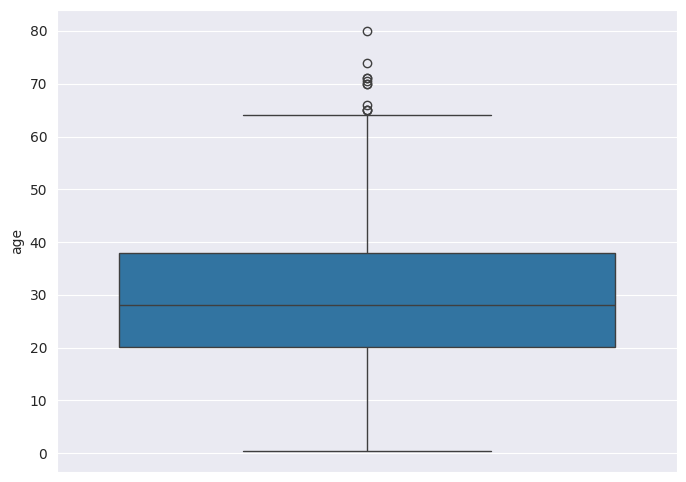

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

plt.rcParams["figure.figsize"] = [8,6]
sns.set_style("darkgrid")

titanic_data = sns.load_dataset('titanic')

titanic_data.head()
sns.boxplot( y='age', data=titanic_data)

In [ ]:
IQR = titanic_data["age"].quantile(0.75) - titanic_data["age"].quantile(0.25)    #IQR =  Q3 - Q1

lower_age_limit = titanic_data["age"].quantile(0.25) - (IQR * 1.5)                #min = Q1 - 1.5*IQR
upper_age_limit = titanic_data["age"].quantile(0.75) + (IQR * 1.5)                 #max = Q3 + 1.5*IQR

print(lower_age_limit)
print(upper_age_limit)

-6.6875
64.8125


In [ ]:
import numpy as np
a = np.arange(10)
b = np.where(a<5,a,a*10)
print(a)
print(b)

[0 1 2 3 4 5 6 7 8 9]
[ 0  1  2  3  4 50 60 70 80 90]


In [ ]:
x = np.where(titanic_data["age"] < lower_age_limit, True, False)

In [ ]:
age_outliers = np.where(titanic_data["age"] > upper_age_limit, True, x)
age_outliers

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
age_outliers = np.where(titanic_data["age"] > upper_age_limit, True,
            np.where(titanic_data["age"] < lower_age_limit, True, False))
age_outliers

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
age_outliers = np.where(titanic_data["age"] > upper_age_limit, True,
            np.where(titanic_data["age"] < lower_age_limit, True, False))
age_outliers

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
age_with_outliers = titanic_data.loc[age_outliers]
age_with_outliers

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
33,0,2,male,66.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
54,0,1,male,65.0,0,1,61.9792,C,First,man,True,B,Cherbourg,no,False
96,0,1,male,71.0,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True
116,0,3,male,70.5,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
280,0,3,male,65.0,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
456,0,1,male,65.0,0,0,26.5500,S,First,man,True,E,Southampton,no,True
493,0,1,male,71.0,0,0,49.5042,C,First,man,True,NaN,Cherbourg,no,True
630,1,1,male,80.0,0,0,30.0000,S,First,man,True,A,Southampton,yes,True
672,0,2,male,70.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
745,0,1,male,70.0,1,1,71.0000,S,First,man,True,B,Southampton,no,False


In [ ]:
age_with_outliers = titanic_data.loc[~(age_outliers)]
age_with_outliers

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
titanic_without_age_outliers = titanic_data.loc[~(age_outliers)]
titanic_data.shape, titanic_without_age_outliers.shape

((891, 15), (880, 15))

<Axes: ylabel='age'>

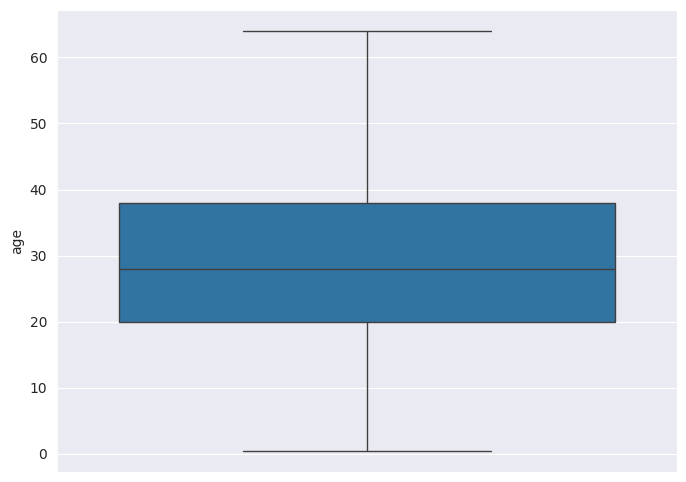

In [ ]:
sns.boxplot( y='age', data = titanic_without_age_outliers)

Outlier Capping using IQR

<Axes: ylabel='fare'>

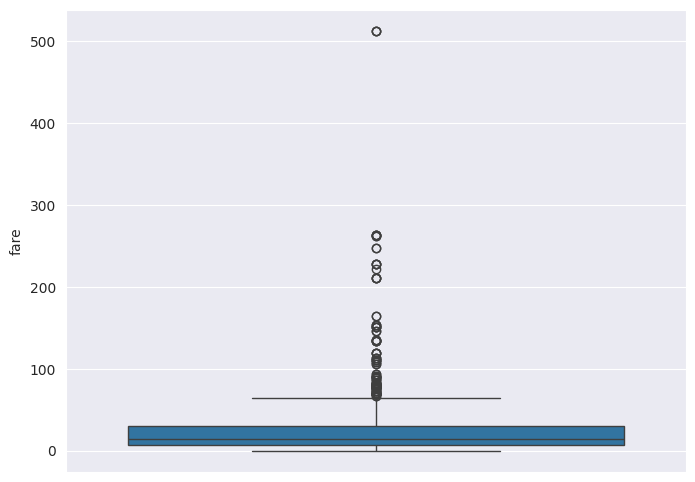

In [ ]:
sns.boxplot( y='fare', data=titanic_data)

In [ ]:
IQR = titanic_data["fare"].quantile(0.75) - titanic_data["fare"].quantile(0.25)    #IQR =  Q3 - Q1

lower_fare_limit = titanic_data["fare"].quantile(0.25) - (IQR * 1.5)                #min = Q1 - 1.5*IQR
upper_fare_limit = titanic_data["fare"].quantile(0.75) + (IQR * 1.5)                 #max = Q3 + 1.5*IQR

print(lower_fare_limit)
print(upper_fare_limit)

-26.724
65.6344


In [ ]:
fare_outliers = np.where(titanic_data["fare"] > upper_fare_limit, True,
            np.where(titanic_data["fare"] < lower_fare_limit, True, False))
fare_outliers

array([False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True, False, False, False,  True, False,
       False, False,

In [ ]:
fare_with_outliers = titanic_data.loc[~(fare_outliers)]
fare_with_outliers

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
titanic_data.shape, fare_with_outliers.shape

((891, 15), (775, 15))

<Axes: ylabel='fare'>

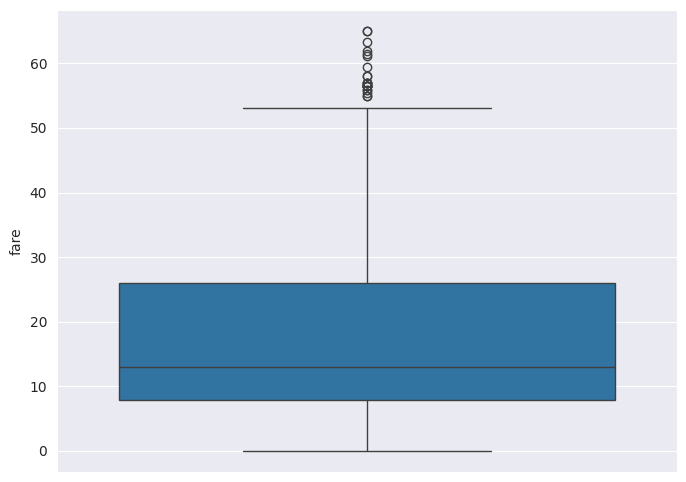

In [ ]:
sns.boxplot( y='fare', data=fare_with_outliers)

In [ ]:
titanic_data["fare"]= np.where(titanic_data["fare"] > upper_fare_limit, upper_fare_limit,
            np.where(titanic_data["fare"] < lower_fare_limit, lower_fare_limit, titanic_data["fare"]))

<Axes: ylabel='fare'>

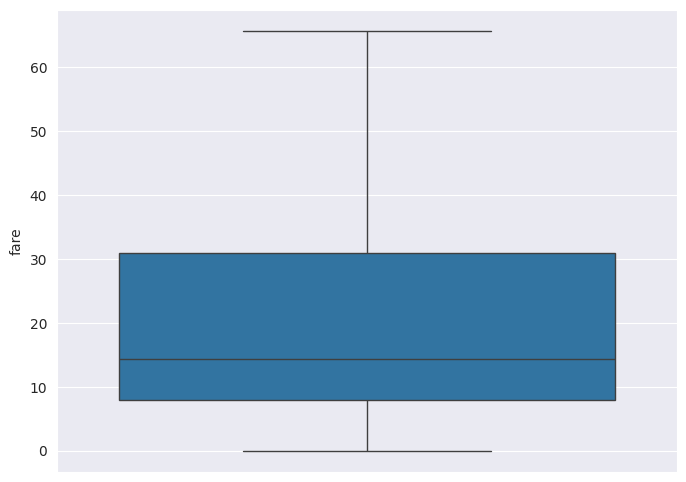

In [ ]:
sns.boxplot( y='fare', data=titanic_data)

In [ ]:
#Outlier Capping Using Mean & Standard Deviation
lower_age_limit = titanic_data["age"].mean() - (3 * titanic_data["age"].std())   #End of distribution or Tail distribution
upper_age_limit = titanic_data["age"].mean() + (3 * titanic_data["age"].std())       #min = mean - 3*std    , max = mean + 3*std

print(lower_age_limit)
print(upper_age_limit)

-13.880374349943303
73.27860964406094


In [ ]:
titanic_data["age"]= np.where(titanic_data["age"] > upper_age_limit, upper_age_limit,
            np.where(titanic_data["age"] < lower_age_limit, lower_age_limit, titanic_data["age"]))

<Axes: ylabel='age'>

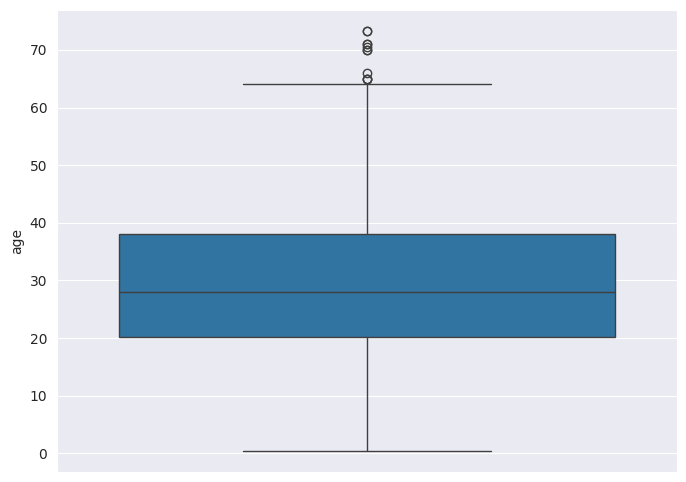

In [ ]:
sns.boxplot( y='age', data=titanic_data)

In [ ]:
#Outlier Capping using quantiles

In [ ]:
lower_fare_limit = titanic_data["fare"].quantile(0.05)
upper_fare_limit = titanic_data["fare"].quantile(0.95)

print(lower_fare_limit)
print(upper_fare_limit)

7.225
65.6344


In [ ]:
titanic_data["fare"]= np.where(titanic_data["fare"] > upper_fare_limit, upper_fare_limit,
            np.where(titanic_data["fare"] < lower_fare_limit, lower_fare_limit, titanic_data["fare"]))

<Axes: ylabel='fare'>

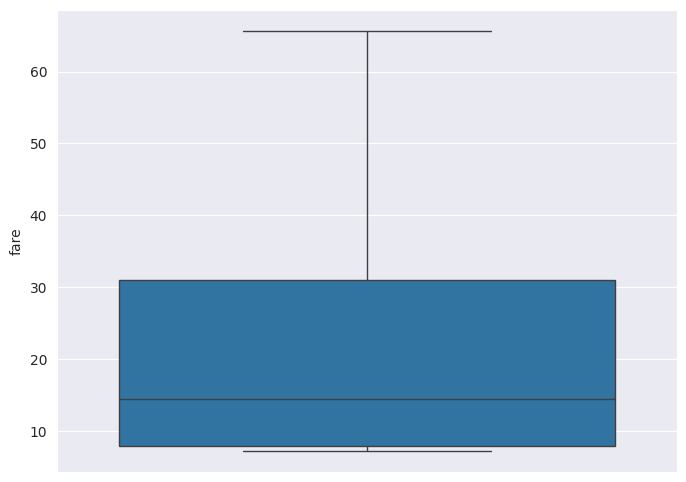

In [ ]:
sns.boxplot( y='fare', data=titanic_data)

In [ ]:
print(titanic_data.age.max())
print(titanic_data.age.min())

73.27860964406094
0.42


In [ ]:
titanic_data["age"]= np.where(titanic_data["age"] > 50, 50,
            np.where(titanic_data["age"] < 10, 10, titanic_data["age"]))

In [ ]:
print(titanic_data.age.max())
print(titanic_data.age.min())

50.0
10.0


<Axes: ylabel='age'>

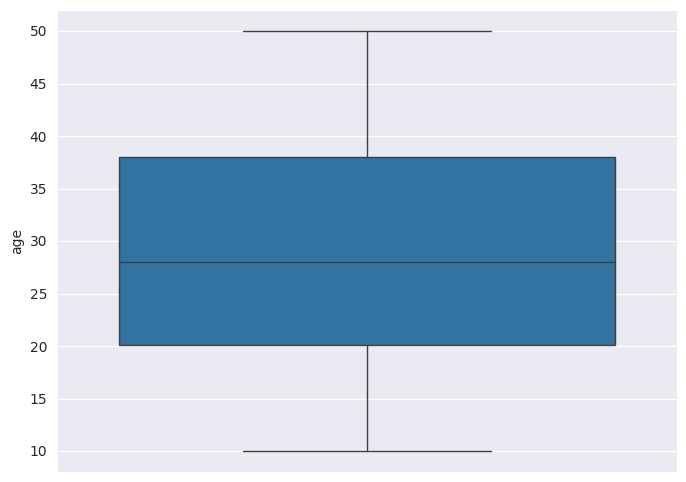

In [ ]:
sns.boxplot( y='age', data=titanic_data)

Exercise

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

plt.rcParams["figure.figsize"] = [8,6]
sns.set_style("darkgrid")

dots_data = sns.load_dataset('dots')

dots_data.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


<Axes: ylabel='firing_rate'>

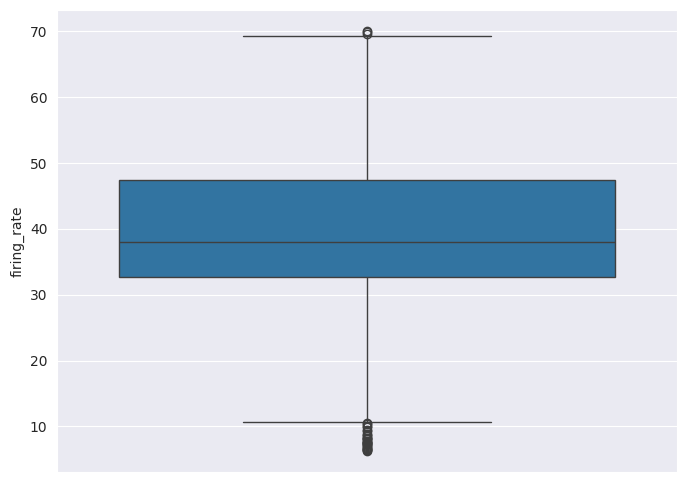

In [ ]:
sns.boxplot(y='firing_rate', data=dots_data)

In [ ]:
IQR = dots_data["firing_rate"].quantile(0.75) - dots_data["firing_rate"].quantile(0.25)    #IQR =  Q3 - Q1

lower_firing_rate_limit = dots_data["firing_rate"].quantile(0.25) - (IQR * 1.5)                #min = Q1 - 1.5*IQR
upper_firing_rate_limit = dots_data["firing_rate"].quantile(0.75) + (IQR * 1.5)                 #max = Q3 + 1.5*IQR

print(lower_firing_rate_limit)
print(upper_firing_rate_limit)

10.475002351424987
69.52883755722502


In [ ]:
x = np.where(dots_data["firing_rate"] < lower_firing_rate_limit, True, False)

In [ ]:
age_outliers = np.where(titanic_data["age"] > upper_age_limit, True, x)
age_outliers

ValueError: operands could not be broadcast together with shapes (891,) () (848,) 